In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
21873,31906,1.285161,-0.701455,0.221870,-0.744753,-0.674967,0.034267,-0.631373,0.097860,-0.835749,...,0.083025,0.190059,-0.074942,-0.278466,0.463615,-0.223877,0.011735,0.000997,39.75,0.0
21874,31906,-0.345979,1.094568,1.282208,0.068241,-0.016965,-0.989567,0.693958,-0.050855,-0.333856,...,-0.266852,-0.723026,-0.003364,0.322646,-0.173496,0.073145,0.241997,0.097610,5.99,0.0
21875,31907,1.171852,0.718042,-0.227521,1.373722,0.152349,-0.949840,0.271427,-0.153000,-0.184297,...,-0.013584,0.088759,-0.059148,0.278992,0.589886,-0.319374,0.055064,0.058347,1.00,0.0
21876,31907,1.209330,-1.130242,1.614261,0.000265,-1.974416,0.262320,-1.369554,0.173769,0.639855,...,-0.520157,-0.573057,0.037646,0.488580,0.161446,1.067798,0.025745,0.028549,40.00,0.0
21877,31907,-0.184653,0.376693,0.632988,-2.282365,0.403553,-0.371666,0.695359,-0.064835,0.610986,...,-0.130997,-0.312833,-0.156567,-0.899683,0.093186,-0.130187,0.029255,0.009228,NaN,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,21878.0,16924.271551,11005.409549,0.000000,5496.250000,18770.500000,27778.750000,31907.000000
V1,21878.0,-0.241060,1.880901,-30.552380,-0.960913,-0.299205,1.164867,1.960497
V2,21878.0,0.222124,1.518111,-40.978852,-0.350012,0.206484,0.858497,16.713389
V3,21878.0,0.737915,1.740947,-31.103685,0.298029,0.888730,1.520365,4.101716
V4,21878.0,0.262153,1.451072,-5.172595,-0.649075,0.222271,1.132694,11.927512
V5,21878.0,-0.175227,1.414872,-32.092129,-0.756733,-0.210143,0.332839,34.099309
V6,21878.0,0.087496,1.322606,-23.496714,-0.660688,-0.176618,0.481047,21.393069
V7,21878.0,-0.141011,1.323924,-26.548144,-0.597972,-0.069763,0.447633,34.303177
V8,21878.0,0.019339,1.383927,-41.484823,-0.169171,0.026032,0.281472,20.007208
V9,21878.0,0.562079,1.277273,-7.175097,-0.273362,0.515162,1.330385,10.392889


In [ ]:
df.unique()

,0
Time,14078
V1,21275
V2,21275
V3,21275
V4,21275
V5,21275
V6,21275
V7,21275
V8,21275
V9,21275


In [ ]:
df.corr()['Class'].sort_values(ascending=False)

,Class
Class,1.000000
V11,0.284211
V4,0.261522
V2,0.259959
V8,0.200598
V27,0.135965
V20,0.065875
V21,0.042885
V25,0.032147
V19,0.029348


In [ ]:
df.duplicated().sum()

81

In [ ]:
df=df.drop_duplicates()

In [ ]:
df['Class'].value_counts()

,count
Class,
0.0,21710
1.0,86


In [ ]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

In [ ]:
fraud.Amount.describe()

,Amount
count,86.000000
mean,93.996860
std,260.195133
min,0.000000
25%,1.000000
50%,1.000000
75%,99.990000
max,1809.680000


In [ ]:
non_fraud.Amount.describe()

,Amount
count,21710.000000
mean,71.814852
std,205.134590
min,0.000000
25%,5.990000
50%,17.610000
75%,62.480000
max,7879.420000


CLASS DISTRIBUTION


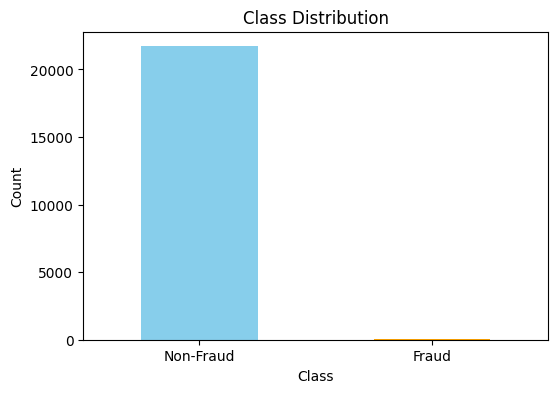

In [ ]:
class_counts = df['Class'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

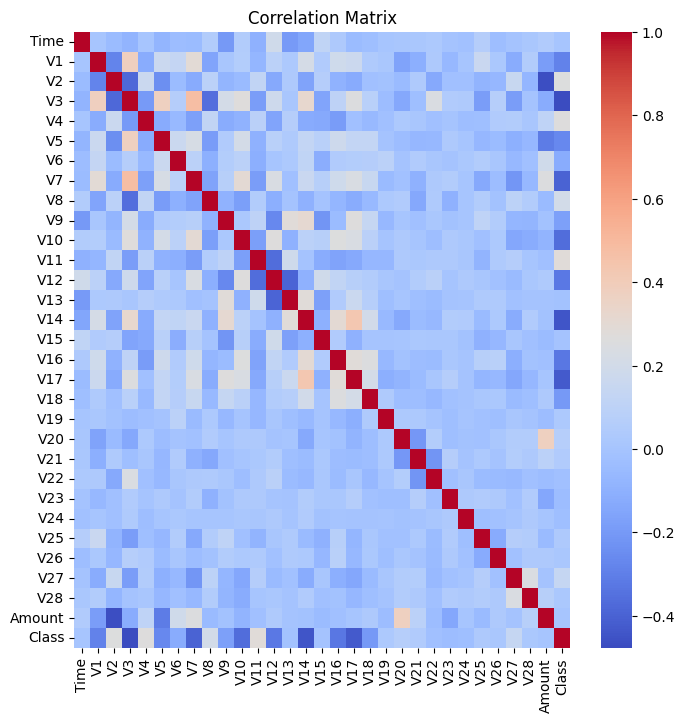

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

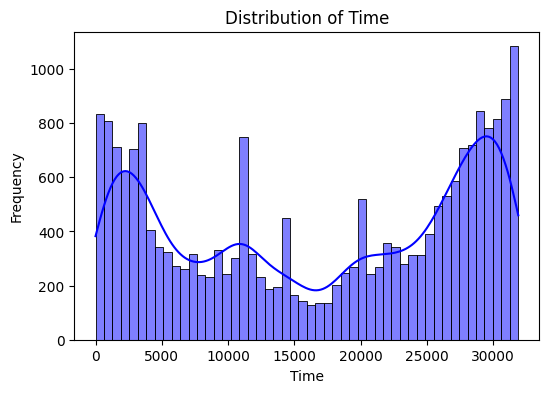

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

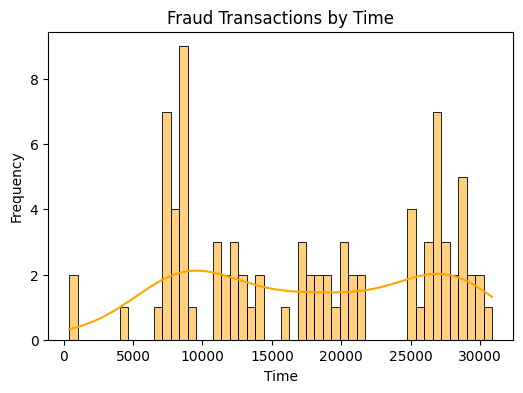

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(fraud['Time'], bins=50, kde=True, color='orange')
plt.title('Fraud Transactions by Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

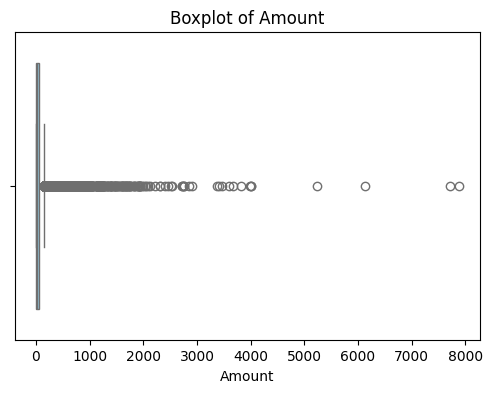

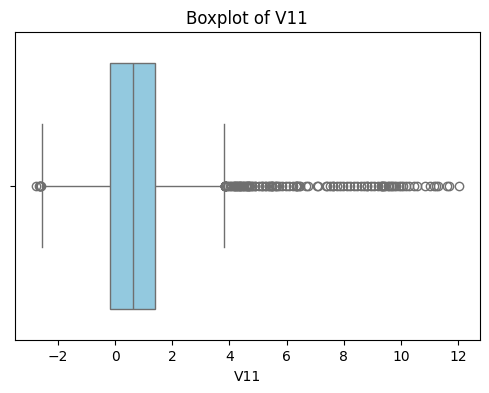

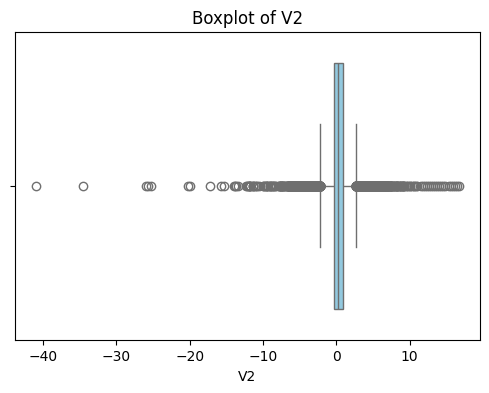

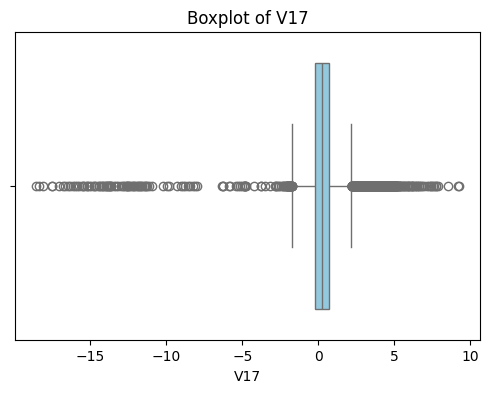

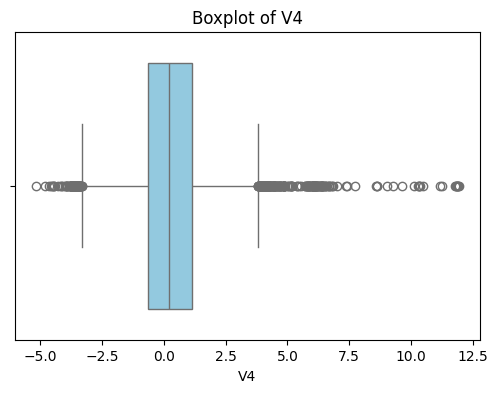

In [ ]:
features = ['Amount', 'V11', 'V2', 'V17', 'V4']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
X=df.drop(columns='Class')

y=df['Class']

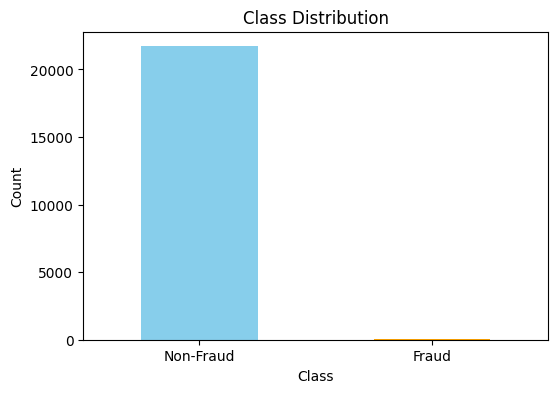

In [ ]:
class_counts = y.value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Count')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.2,random_state=42, stratify=y)

ValueError: Input y contains NaN.

In [ ]:
import numpy as np

print(np.isnan(y).any())  # Checks if there are any NaN values
print(np.where(np.isnan(y)))

True
(array([21796]),)


In [ ]:
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

y = y.values if hasattr(y, 'values') else y

imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.reshape(-1, 1)).ravel()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


SYNTHETIC MINORITY OVERSAMPLING TECHNOLOGY


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
LG = LogisticRegression()
LG.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_Test = LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

In [ ]:
y_predTest=LG.predict(X_test)
y_predTrain=LG.predict(X_train_resampled)

ACCURACY

In [ ]:
print("\nAccuracy Score:")

print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")

print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")


Accuracy Score:
Train Accuracy: 0.9821788449357978
Test Accuracy: 0.9818807339449541


In [ ]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")

print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 0.9777163586111591
Test Recall: 0.8823529411764706


In [ ]:
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4343
         1.0       0.16      0.88      0.28        17

    accuracy                           0.98      4360
   macro avg       0.58      0.93      0.63      4360
weighted avg       1.00      0.98      0.99      4360



In [ ]:
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[4266   77]
 [   2   15]]


XGBoost


In [ ]:
model = XGBClassifier(
    n_estimators=500,          # Reduce the number of trees
    learning_rate=0.1,         # Use a smaller learning rate
    max_depth=4,               # Reduce tree depth
    min_child_weight=3,        # Increase minimum child weight
    subsample=0.7,             # Use a subset of the data for training
    colsample_bytree=0.7,      # Use a subset of features for training
    gamma=1,                   # Minimum loss reduction required for split
    reg_alpha=2,               # Increase L1 regularization
    reg_lambda=2               # Increase L2 regularization
)
model.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print("\nAccuracy Score:")
print(f"Train Accuracy: {accuracy_score(y_train_resampled, y_predTrain)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_predTest)}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Accuracy Score:
Train Accuracy: 0.999827258593885
Test Accuracy: 0.998165137614679
Cross-Validation Accuracy: 0.9991


In [ ]:
print("\nPrecision Score:")

print(f"Train Precision: {precision_score(y_train_resampled, y_predTrain)}")

print(f"Test Precision: {precision_score(y_test, y_predTest)}")


Precision Score:
Train Precision: 0.9996546365049215
Test Precision: 0.7142857142857143


In [ ]:
print("\nRecall Score:")

print(f"Train Recall: {recall_score(y_train_resampled, y_predTrain)}")

print(f"Test Recall: {recall_score(y_test, y_predTest)}")


Recall Score:
Train Recall: 1.0
Test Recall: 0.8823529411764706


In [ ]:
print("\nClassification Report (Test):")

print(classification_report(y_test, y_predTest))


Classification Report (Test):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4343
         1.0       0.71      0.88      0.79        17

    accuracy                           1.00      4360
   macro avg       0.86      0.94      0.89      4360
weighted avg       1.00      1.00      1.00      4360



In [ ]:
print("Confusion Matrix (Test):")

print(confusion_matrix(y_test, y_predTest))

Confusion Matrix (Test):
[[4337    6]
 [   2   15]]
